In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [2]:
from pdfrw import PdfReader

In [3]:
x=PdfReader('tempcal.pdf')
x.keys()

['/Size', '/Root', '/Info', '/ID']

In [4]:
x.Info

{'/Author': '(jwymore)',
 '/CreationDate': '(D:20151109131230)',
 '/Creator': '(PScript5.dll Version 5.2.2)',
 '/ModDate': '(D:20151109131230)',
 '/Producer': '(GPL Ghostscript 8.15)',
 '/Title': '(CondCalibrationReport)'}

In [8]:
y = x.pages[0].pdfstring

In [14]:
import PyPDF2

In [16]:
pdfFileObj = open('sbe19.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
pageObj.extractText()

'                                   f = Instrument Output (Hz) / 1000.0t = temperature (°C);    p = pressure (decibars);    d = CTcor;    e = CPcor;Conductivity (S/m) = (g + h * f2+ i * f3 + j * f4) /10 (1 + d * t + e * p)Residual (Siemens/meter) = instrument conductivity - bath conductivitySea-Bird Electronics, Inc.13431 NE 20th Street, Bellevue, WA 98005-2010 USAPhone: (+1) 425-643-9866 Fax (+1) 425-643-9954 Email: seabird@seabird.comSENSOR SERIAL NUMBER: 6000CALIBRATION DATE: 16-Mar-17SBE 19plus V2 CONDUCTIVITY CALIBRATION DATAPSS 1978: C(35,15,0) = 4.2914 Siemens/meterCOEFFICIENTS:g = -1.070115e+000h =  1.666822e-001i = -2.133476e-003j =  1.694100e-004CPcor = -9.5700e-008CTcor =  3.2500e-006BATH TEMP(° C)BATH SAL(PSU)BATH COND(S/m)INSTRUMENTOUTPUT (Hz)INSTRUMENTCOND (S/m)RESIDUAL(S/m)22.00001.00004.500015.000018.500024.000029.000032.50000.000034.799734.780034.737934.729034.719334.714134.71100.000002.974683.281644.263014.608045.165795.687466.059702567.605024.135212.605773.325957.646

In [29]:
df = pd.read_csv('dummydata.csv')
df = df.drop(df.index[0])
df.head()

,btemp,bsal,bcond,ioutput,icond,Residual
1,1.0,34.7997,2.97468,5024.13,2.9746,-0.00006
2,4.5,34.7800,3.28164,5212.60,3.2817,0.00006
3,15.0,34.7379,4.26301,5773.32,4.2631,0.00004
4,18.5,34.7290,4.60804,5957.64,4.6080,-0.00002
5,24.0,34.7193,5.16579,6243.79,5.1657,-0.00006


In [34]:
df2 = pd.read_csv('dummydata.csv')
df2 = df2.drop(df2.index[0])
df2 = df2.multiply(1.1)
df2.head()

,btemp,bsal,bcond,ioutput,icond,Residual
1,1.10,38.27967,3.272148,5526.543,3.27206,-0.000066
2,4.95,38.25800,3.609804,5733.860,3.60987,0.000066
3,16.50,38.21169,4.689311,6350.652,4.68941,0.000044
4,20.35,38.20190,5.068844,6553.404,5.06880,-0.000022
5,26.40,38.19123,5.682369,6868.169,5.68227,-0.000066


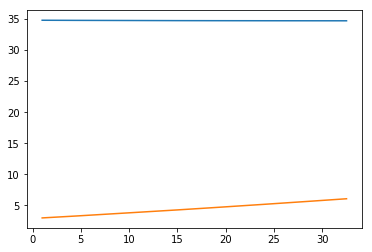

In [30]:
#ax = plt.subplot(111)
plt.plot(df['btemp'], df['bsal'], label="bsal")
plt.plot(df['btemp'], df['bcond'], label='bcond')
plt.show()